Reading test/labels: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1326/1326 [00:00<00:00, 2338.96it/s]


✅ Loaded 1812212 boxes


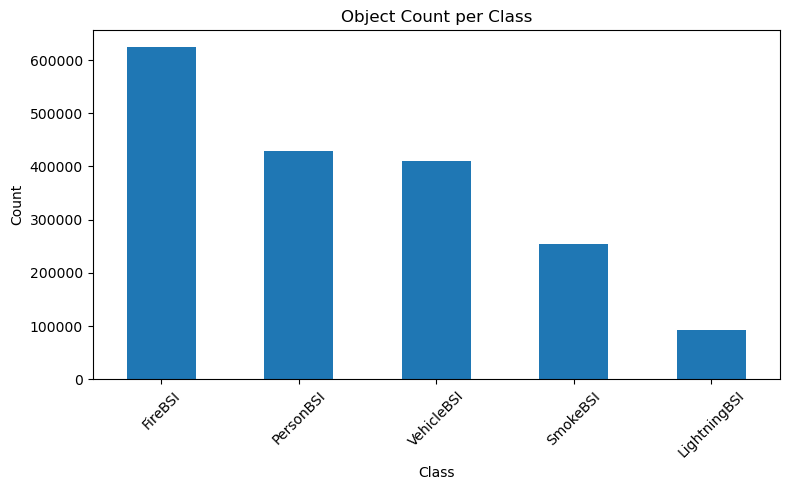

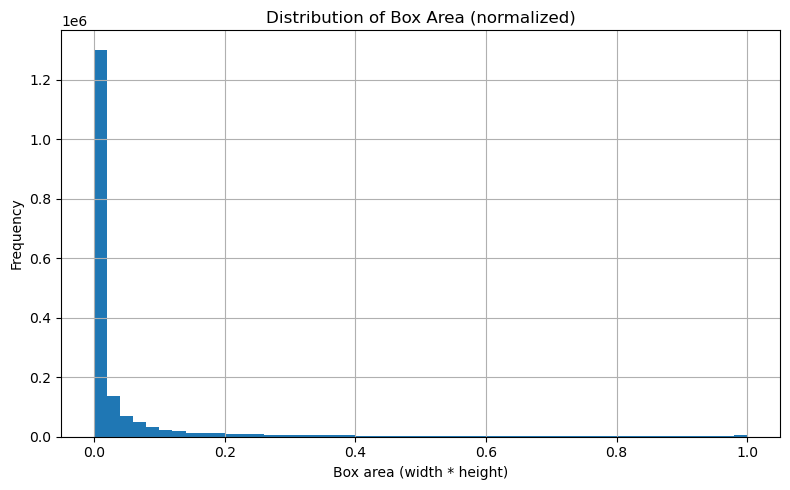

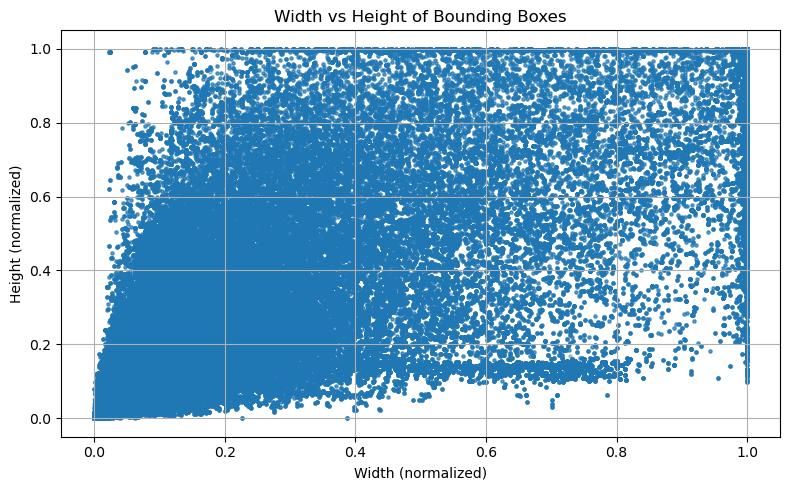

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# === CONFIG ===
DATA_DIR = "VisionNest.v4i.yolov8"
LABEL_DIRS = ["train/labels", "valid/labels", "test/labels"]
CLASS_NAMES = ['FireBSI', 'LightningBSI', 'PersonBSI', 'SmokeBSI', 'VehicleBSI']

# === COLLECT LABELS ===
all_boxes = []

for split in LABEL_DIRS:
    label_path = os.path.join(DATA_DIR, split)
    for file in tqdm(os.listdir(label_path), desc=f"Reading {split}"):
        if not file.endswith(".txt"):
            continue
        file_path = os.path.join(label_path, file)
        with open(file_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                cls, x, y, w, h = map(float, parts)
                all_boxes.append({
                    "split": split.split("/")[0],
                    "class_id": int(cls),
                    "class_name": CLASS_NAMES[int(cls)],
                    "width": w,
                    "height": h,
                    "area": w * h,
                })

# === TO DATAFRAME ===
df = pd.DataFrame(all_boxes)
print(f"✅ Loaded {len(df)} boxes")

# === CLASS DISTRIBUTION ===
plt.figure(figsize=(8, 5))
df['class_name'].value_counts().plot(kind='bar')
plt.title("Object Count per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === BOX SIZE DISTRIBUTION ===
plt.figure(figsize=(8, 5))
df['area'].hist(bins=50)
plt.title("Distribution of Box Area (normalized)")
plt.xlabel("Box area (width * height)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# === WIDTH vs HEIGHT ===
plt.figure(figsize=(8, 5))
plt.scatter(df['width'], df['height'], alpha=0.2, s=5)
plt.title("Width vs Height of Bounding Boxes")
plt.xlabel("Width (normalized)")
plt.ylabel("Height (normalized)")
plt.grid(True)
plt.tight_layout()
plt.show()
